# Laliga data set Analysis 
The laliga dataset contains the data from 1995 to 2020 seasons and we will analyze different seasons and draw some conclusion through visualizations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = [18, 5]
pd.set_option('display.max_rows', 20)

In [5]:
laliga = pd.read_csv('dataset/laliga.csv')

In [6]:
laliga

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D


In [7]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


## Analysis of the 95-96 season

In [8]:
season_95 = laliga[laliga['Season'] == '1995-96']

##### How many teams were in the season 1995-96

In [9]:
season_95['HomeTeam'].unique().size

22

#### Who won the league?

In [10]:
# record will be stored for each team's away and home scored goals in a tuple form 
team_records = {}

In [11]:
for value,row in season_95.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    if row['FTR'] == 'H':
        if home in team_records:
            team_records[home] += 3
        else:
            team_records[home] = 3
    elif row['FTR'] == 'A':
        if away in team_records:
            team_records[away] += 3
        else:
            team_records[away] = 3
    else:
        if away in team_records:
            team_records[away] += 1
        else:
            team_records[away] = 1
        
        if home in team_records:
            team_records[home] += 1
        else:
            team_records[home] = 1

In [12]:
def get_max(record):
    """Recieve the dictionary and return key with max value"""
    val = list(record.values())
    keys = list(record.keys())
    return keys[val.index(max(val))]

### Who won the league of 1995-96 season

In [13]:
print(f'{get_max(team_records)}  won the 1995-1996 league')

Ath Madrid  won the 1995-1996 league


## Analyzing the home, away wins and draws throughout the season for all teams

In [14]:
# seperating the dataFrames for away, home and draw
home_wins_95 = season_95[season_95['FTR']=='H'].groupby('HomeTeam').agg({'FTR':'count'})
away_wins_95 = season_95[season_95['FTR']=='A'].groupby('AwayTeam').agg({'FTR':'count'})
draw_95 = season_95[season_95['FTR']=='D'].groupby('AwayTeam').agg({'FTR':'count'})

In [15]:
# renaming the column in the dataFrames and then combining into one
home_wins_95.rename(columns={'FTR':'Home_wins'}, inplace=True)
away_wins_95.rename(columns={'FTR':'Away_wins'}, inplace=True)
draw_95.rename(columns={'FTR':'draws'}, inplace=True)

In [16]:
# merging the above dataFrames and renaming the index
home_away_combined_df = home_wins_95.merge(away_wins_95, left_index=True, right_index=True)
results_95 = home_away_combined_df.merge(draw_95, left_index=True, right_index=True)
results_95.index.names = ['Team']
results_95.sort_values(['Home_wins','Away_wins','draws'], ascending=False, inplace=True)

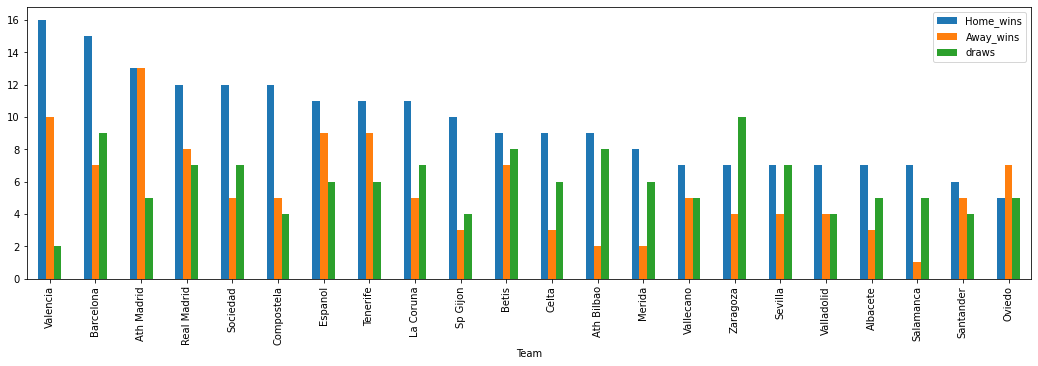

In [17]:
results_95.plot(kind='bar')
plt.show()

In [18]:
# converting the Date column from Object to Date 
season_95['Date'] = pd.to_datetime(season_95['Date'])

<ipython-input-18-9026faa46275>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_95['Date'] = pd.to_datetime(season_95['Date'])


##### Top two teams, Valencia and Athletico Madrid

In [19]:
valencia = season_95[(season_95['HomeTeam']=='Valencia') | (season_95['AwayTeam']=='Valencia')]
athletico_madrid = season_95[(season_95['HomeTeam']=='Ath Madrid') | (season_95['AwayTeam']=='Ath Madrid')]

In [20]:
valencia

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,1995-02-09,La Coruna,Valencia,3,0,H,2.0,0.0,H
21,1995-96,1995-10-09,Valencia,Valladolid,1,0,H,0.0,0.0,D
26,1995-96,1995-09-17,Merida,Valencia,0,2,A,0.0,0.0,D
43,1995-96,1995-09-24,Valencia,Zaragoza,0,0,D,0.0,0.0,D
53,1995-96,1995-01-10,Vallecano,Valencia,3,2,H,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
407,1995-96,1996-04-27,Ath Madrid,Valencia,2,3,A,1.0,1.0,D
418,1995-96,1996-04-05,Valencia,Sp Gijon,1,0,H,0.0,0.0,D
434,1995-96,1996-12-05,Sevilla,Valencia,1,2,A,0.0,1.0,A
449,1995-96,1996-05-19,Valencia,Espanol,1,0,H,0.0,0.0,D
